In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


In [53]:
import folium

# Create a base map centered around Chennai, India
m = folium.Map(location=[13.0827, 80.2707], zoom_start=12)

# Add markers for confirmed cases, vaccination rates, and preferences
folium.Marker([13.0827, 80.2707], popup='Confirmed Cases: 5000', tooltip='Click for Details').add_to(m)
folium.Marker([13.0837, 80.2717], popup='Vaccination Rate: 65%', tooltip='Click for Details').add_to(m)
folium.Marker([13.0847, 80.2727], popup='Vaccine Preferences: Covishield', tooltip='Click for Details').add_to(m)

# Display the map
m



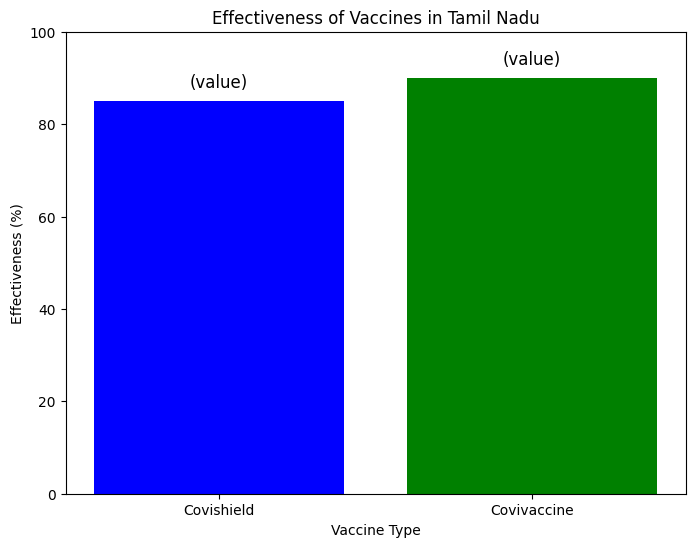

In [54]:
import matplotlib.pyplot as plt
# Example Data
vaccines = ['Covishield', 'Covivaccine']
effectiveness = [85, 90] # Example effectiveness rates in percentage
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(vaccines, effectiveness, color=['blue', 'green'])
plt.xlabel('Vaccine Type')
plt.ylabel('Effectiveness (%)')
plt.title("Effectiveness of Vaccines in Tamil Nadu")
plt.ylim(0, 100)
# Add data labels
for i, value in enumerate(effectiveness):
    plt.text(i, value + 2, f'(value)', ha='center', va='bottom', fontsize=12, color="black")
#Show the chart
plt.show()

In [55]:
import pandas as pd

df = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")

num_rows_before = df.shape[0]

df = df.dropna(subset=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'], how='all')

num_rows_after = df.shape[0]

rows_removed = num_rows_before - num_rows_after

print(f"Number of rows removed: {rows_removed}")

Number of rows removed: 42483


In [69]:
import pandas as pd

df = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv',sep=',')

num_rows_before = df.shape[0]

df = df[(df['total_vaccinations'].notna()) & (df['total_vaccinations'] != 0)]

num_rows_after = df.shape[0]

rows_removed = num_rows_before - num_rows_after
_
print(f"Number of rows removed: {rows_removed}")

Number of rows removed: 1482


In [70]:
import pandas as pd
df_vaccinations = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")
df_manufacturer = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv',sep=',')
merged_df = pd.merge(df_vaccinations, df_manufacturer, on='total_vaccinations') 
print(merged_df)

            country iso_code      date_x  total_vaccinations  \
0       Afghanistan      AFG  2021-02-22                 0.0   
1       Afghanistan      AFG  2021-02-22                 0.0   
2       Afghanistan      AFG  2021-02-22                 0.0   
3       Afghanistan      AFG  2021-02-22                 0.0   
4       Afghanistan      AFG  2021-02-22                 0.0   
...             ...      ...         ...                 ...   
187750     Zimbabwe      ZWE  2021-02-18                39.0   
187751     Zimbabwe      ZWE  2021-02-18                39.0   
187752     Zimbabwe      ZWE  2021-02-18                39.0   
187753     Zimbabwe      ZWE  2021-03-09             36307.0   
187754     Zimbabwe      ZWE  2021-03-23             45743.0   

        people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                     0.0                      NaN                     NaN   
1                     0.0                      NaN                     NaN 

In [71]:
df = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv").head (5)
df['date'] = pd.to_datetime(df['date'])
df.fillna(0, inplace=True)
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


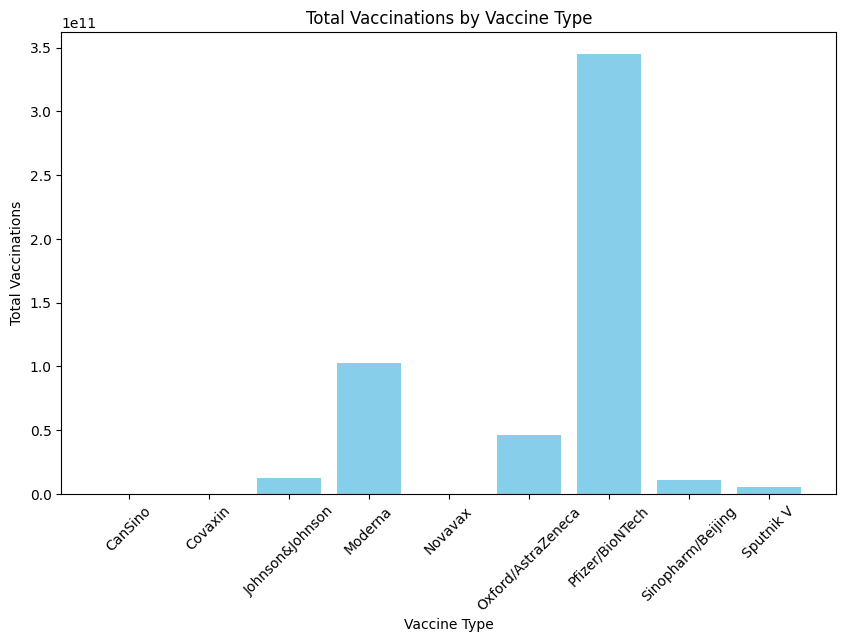

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv',sep=',')
additional_vaccines = ['CanSino', 'Pfizer/BioNTech', 'Johnson&Johnson', 'Covaxin', 'Novavax']
selected_vaccines = ['Moderna', 'Oxford/AstraZeneca', 'Sinopharm/Beijing', 'Sputnik V']+ additional_vaccines
df_selected_vaccines = df[df['vaccine'].isin (selected_vaccines)]
vaccine_totals=df_selected_vaccines.groupby('vaccine')['total_vaccinations'].sum()
plt.figure(figsize=(10,6))
plt.bar(vaccine_totals.index, vaccine_totals.values, color='skyblue')
plt.xlabel('Vaccine Type')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations by Vaccine Type')
plt.xticks(rotation=45)
plt.show()

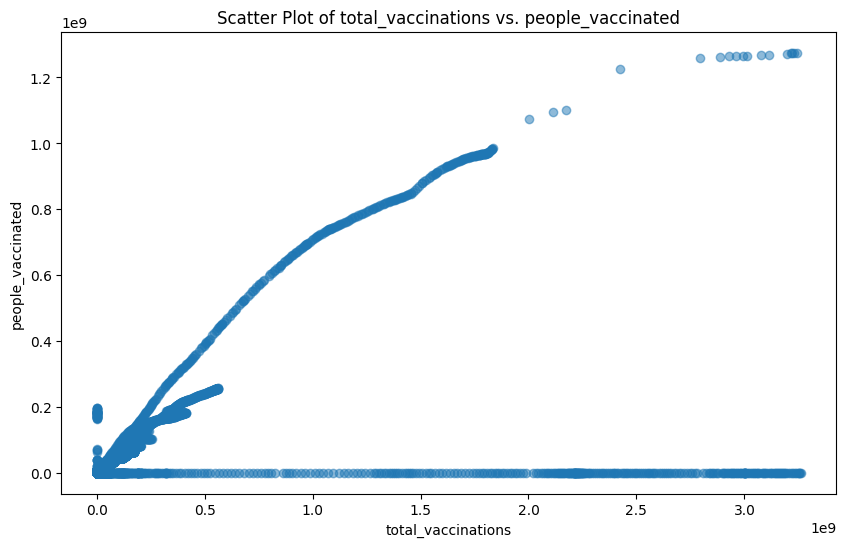

In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")
df['date'] = pd.to_datetime (df['date'])
df.fillna(0,inplace=True)
df = pd.get_dummies (df, columns=['country','iso_code'], drop_first=True)
plt.figure(figsize=(10, 6))
x_variable='total_vaccinations'
y_variable="people_vaccinated"
plt.scatter(df[x_variable], df[y_variable], alpha=0.5)
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'Scatter Plot of {x_variable} vs. {y_variable}')
plt.show()

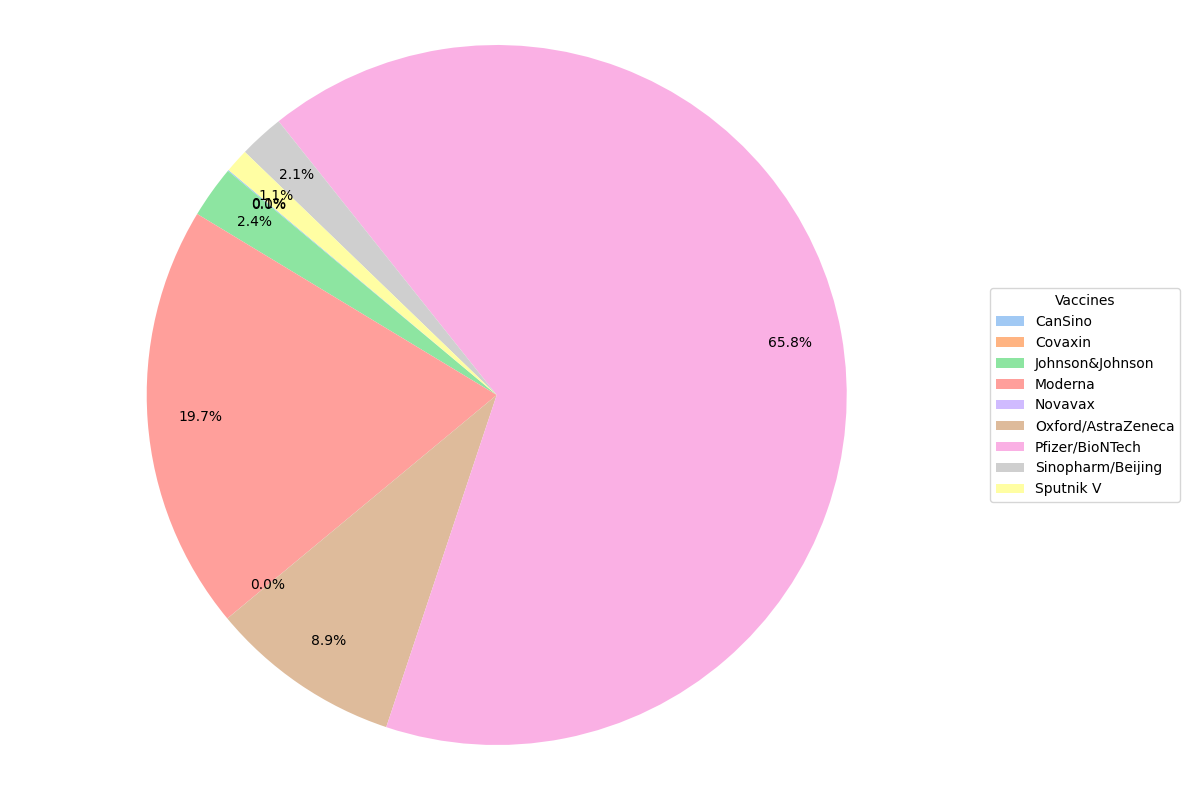

In [75]:
import seaborn as sns

colors = sns.color_palette('pastel', len(vaccine_totals))

plt.figure(figsize=(12, 8))

wedges, texts, autotexts = plt.pie(vaccine_totals, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)

plt.axis('equal')  

plt.legend(wedges, vaccine_totals.index, title="Vaccines", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()

plt.show()

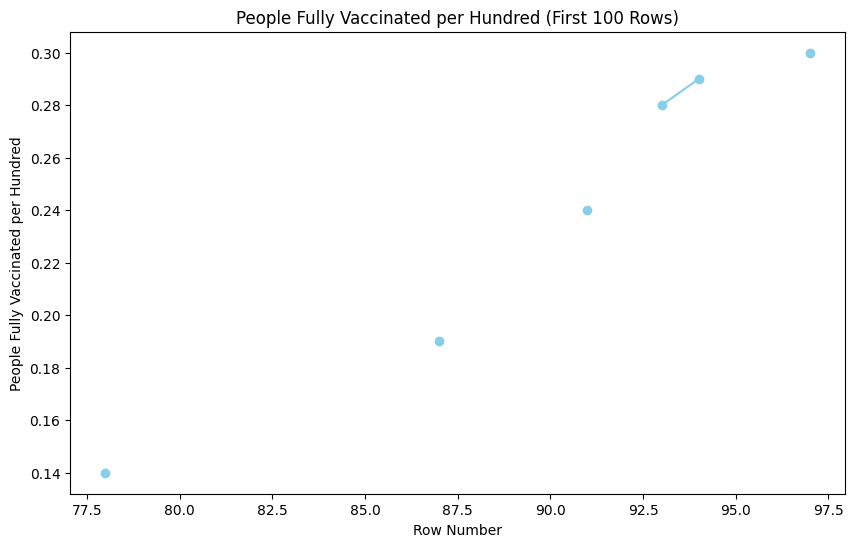

In [85]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv").head(100)

plt.figure(figsize=(10, 6))

plt.plot(df['people_fully_vaccinated_per_hundred'], marker='o', color='skyblue', linestyle='-')

plt.xlabel('Row Number')

plt.ylabel('People Fully Vaccinated per Hundred')

plt.title('People Fully Vaccinated per Hundred (First 100 Rows)')





plt.show()

In [77]:
import pandas as pd

df = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate the percentage
df['percentage_fully_vaccinated'] = (df['people_fully_vaccinated'] / df['total_vaccinations']) * 100

# Sort the DataFrame by country, year, and month__
df_sorted = df.sort_values(by=['country', 'year', 'month'])

# Group by country, year, and month, then calculate the average percentage for each month
result = df_sorted.groupby(['country', 'year', 'month'])['percentage_fully_vaccinated'].mean()

# Reset the index to get the DataFrame format
result_df = result.reset_index()

# Print the result DataFrame
print(result_df)

          country  year  month  percentage_fully_vaccinated
0     Afghanistan  2021      2                          NaN
1     Afghanistan  2021      3                          NaN
2     Afghanistan  2021      4                          NaN
3     Afghanistan  2021      5                    16.675279
4     Afghanistan  2021      6                    23.651193
...           ...   ...    ...                          ...
3013     Zimbabwe  2021     11                    43.366796
3014     Zimbabwe  2021     12                    42.953565
3015     Zimbabwe  2022      1                    43.225408
3016     Zimbabwe  2022      2                    43.138566
3017     Zimbabwe  2022      3                    41.875884

[3018 rows x 4 columns]


In [79]:
import pandas as pd
import folium

# Load the dataset with total vaccinations by manufacturer
data = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv',sep=',')

# Filter data for Argentina,we can give any country we want.
argentina_data = data[data['location'] == 'Argentina']
total_vaccinations_by_vaccine = argentina_data.groupby('vaccine')['total_vaccinations'].sum().reset_index()

# Get the latitude and longitude for Argentina
argentina_lat = -38.4161
argentina_lon = -63.6167

# Create a base map centered on Argentina
map = folium.Map(location=[argentina_lat, argentina_lon], zoom_start=4)

# Generate popup content with vaccine names and total vaccinations
popup_content = '<br>'.join(f"{row['vaccine']} - {row['total_vaccinations']}" for _, row in total_vaccinations_by_vaccine.iterrows())

# Add a marker with the popup content
folium.Marker(
    location=[argentina_lat, argentina_lon],
    popup=folium.Popup(popup_content, max_width=300),
    icon=folium.Icon(color='blue')
).add_to(map)

# Show the map
map

In [84]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv',sep=',')

# Calculate vaccination rate by vaccine type
vaccination_rate_by_vaccine = data.groupby('vaccine')['total_vaccinations'].sum() / data.groupby('vaccine').size()

# Create a new DataFrame to store the result
result_df = pd.DataFrame({'vaccination_rate_by_vaccine': vaccination_rate_by_vaccine})

# Merge the result DataFrame with the original data on 'vaccine'
data = data.merge(result_df, on='vaccine', how='left')

# Show the result
print(data)

             location        date             vaccine  total_vaccinations  \
0           Argentina  2020-12-29             Moderna                   2   
1           Argentina  2020-12-29  Oxford/AstraZeneca                   3   
2           Argentina  2020-12-29   Sinopharm/Beijing                   1   
3           Argentina  2020-12-29           Sputnik V               20481   
4           Argentina  2020-12-30             Moderna                   2   
...               ...         ...                 ...                 ...   
35618  European Union  2022-03-29  Oxford/AstraZeneca            67403106   
35619  European Union  2022-03-29     Pfizer/BioNTech           600519998   
35620  European Union  2022-03-29   Sinopharm/Beijing             2301516   
35621  European Union  2022-03-29             Sinovac                1809   
35622  European Union  2022-03-29           Sputnik V             1845103   

       vaccination_rate_by_vaccine  
0                     1.552058e+07  
1

In [80]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv',sep=',')

# Calculate total vaccinations by country
total_vaccinations_by_country = data.groupby('location')['total_vaccinations'].sum()

# Convert the result to a DataFrame
result_df = total_vaccinations_by_country.reset_index()

# Rename the columns for better clarity
result_df.columns = ['Country', 'Total Vaccinations']

# Show the result
print(result_df)

           Country  Total Vaccinations
0        Argentina         18678951288
1          Austria           596514759
2          Belgium           834395863
3         Bulgaria           134238313
4            Chile          9931757732
5          Croatia           180468380
6           Cyprus            55063408
7          Czechia          4104977325
8          Denmark           410370596
9          Ecuador          4599104870
10         Estonia            70424761
11  European Union        193020139251
12         Finland           373909900
13          France         32177039372
14         Germany         38982830332
15       Hong Kong          2684669290
16         Hungary           591312341
17         Iceland             4560663
18         Ireland           346279647
19           Italy         28306588441
20           Japan          3910422920
21          Latvia           596129865
22   Liechtenstein             2299059
23       Lithuania           154484516
24      Luxembourg       

Coefficient: 67905.85580252815
Intercept: -2954051.2822800055


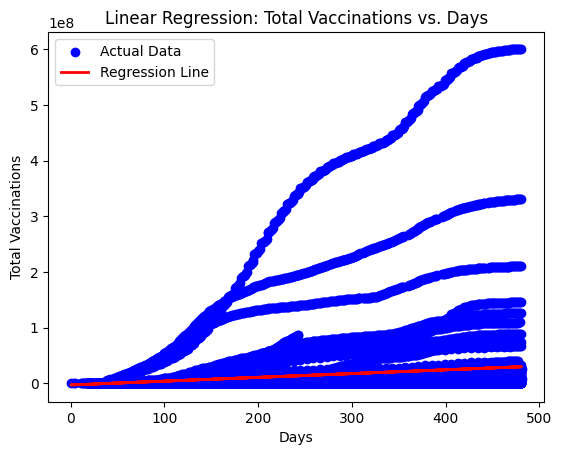

In [86]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv',sep=',')

# Convert 'date' to numerical format (number of days since the start date)
data['date'] = (pd.to_datetime(data['date']) - pd.to_datetime(data['date']).min()).dt.days

# Prepare the feature matrix X and the target variable y
X = data[['date']]
y = data['total_vaccinations']

# Initialize the Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X, y)

# Print the coefficients
print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

# Predict total vaccinations
predictions = model.predict(X)

# Create a scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual Data')
# Plot the regression line
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Total Vaccinations')
plt.title('Linear Regression: Total Vaccinations vs. Days')
# Add legend
plt.legend()
# Show the plot
plt.show()

In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv',sep=',')

# Convert 'date' to numerical format (number of days since the start date)
data['date'] = (pd.to_datetime(data['date']) - pd.to_datetime(data['date']).min()).dt.days

# Prepare the feature matrix X and the target variable y
X = data[['date']]
y = data['total_vaccinations']

# Initialize the Linear Regression model
model = LinearRegression()

# Training the model x,y
model.fit(X, y)

# Predicting total vaccinations
predictions = model.predict(X)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
r_squared = r2_score(y, predictions)

# Printing the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r_squared:.2f}')

Root Mean Squared Error (RMSE): 51122830.05
Mean Absolute Error (MAE): 20286696.16
R-squared (R2): 0.03
